**LÀM SẠCH DỮ LIỆU*


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
#Dowload tệp tin đã tải xuống máy tính
from google.colab import files
uploaded = files.upload()

Saving Data WorldBank.csv to Data WorldBank.csv


In [ ]:
df = pd.read_csv("Data WorldBank.csv")
print(df)

In [ ]:
#Xem dữ liệu GDP của các nước
data_GDP = df[df['Series Name'].isin(['GDP (current US$)'])]
print(data_GDP)

In [ ]:
#Sắp xếp lại bảng
id_vars = ["Country Name","Country Code", "Series Name", "Series Code"]
a = pd.melt(frame=data_GDP, id_vars=id_vars, var_name='Year', value_name='GDP')
print(a)

In [ ]:
#Đổi tên cột
change1 = a.rename(columns={'Series Code':'Series Code 1','Series Name':'Series Name 1','Country Code':'Country Code 1'})
print(change1)

In [ ]:
data_Inflation = df[df['Series Name'].isin(['Inflation, GDP deflator (annual %)'])]
print(data_Inflation)

In [ ]:
id_vars_1 = ["Country Name","Country Code", "Series Name", "Series Code"]
b = pd.melt(frame=data_Inflation, id_vars=id_vars, var_name='Year', value_name='Inflation')
print(b)

In [ ]:
change2 = b.rename(columns={'Series Code':'Series Code 2','Series Name':'Series Name 2','Country Code':'Country Code 2','Country Name':'Country Name 2', 'Year':'Year 2'})
print(change2)

In [ ]:
#Ghép bảng 1 vào bảng 2 (Bảng GDP và Bảng Inflation)
merge1 = pd.concat([change1, change2], axis=1)
print(merge1)

In [ ]:
#Bỏ bớt các cột trùng tên
table1 = merge1.drop(['Country Code 1', 'Series Name 1', 'Series Code 1','Country Code 2','Series Name 2','Series Code 2','Country Name 2','Year 2'], axis=1)
print(table1)

Phần dưới tương tự phần ở trên

In [ ]:
data_exchange_rate = df[df['Series Name'].isin(['Official exchange rate (LCU per US$, period average)'])]
print(data_exchange_rate)

In [ ]:
id_vars_2 = ["Country Name","Country Code", "Series Name", "Series Code"]
c = pd.melt(frame=data_exchange_rate, id_vars=id_vars, var_name='Year', value_name='Exchange Rate')
print(c)

In [ ]:
change3 = c.rename(columns={'Series Code':'Series Code 3','Series Name':'Series Name 3','Country Code':'Country Code 3','Country Name':'Country Name 3', 'Year':'Year 3'})
print(change3)

In [ ]:
data_money_supply = df[df['Series Name'].isin(['Broad money (% of GDP)'])]
print(data_money_supply)

In [ ]:
id_vars_3 = ["Country Name","Country Code", "Series Name", "Series Code"]
d = pd.melt(frame=data_money_supply, id_vars=id_vars, var_name='Year', value_name='Money Supply')
print(d)

In [ ]:
change4 = d.rename(columns={'Series Code':'Series Code 4','Series Name':'Series Name 4','Country Code':'Country Code 4','Country Name':'Country Name 4', 'Year':'Year 4'})
print(change4)

In [ ]:
merge2 = pd.concat([change3, change4], axis=1)
print(merge2)

In [ ]:
#Ghép 2 bảng 3 và 4 với nhau (Bảng Unemployment và Bảng CPI )
table2 = merge2.drop(['Country Code 3', 'Series Name 3', 'Series Code 3','Country Code 4','Series Name 4','Series Code 4','Country Name 4','Year 4','Year 3','Country Name 3'], axis=1)
print(table2)

In [ ]:
data_unemployment = df[df['Series Name'].isin(['Unemployment, total (% of total labor force) (modeled ILO estimate)'])]
print(data_unemployment)

In [ ]:
id_vars_4 = ["Country Name","Country Code", "Series Name", "Series Code"]
e = pd.melt(frame=data_unemployment, id_vars=id_vars, var_name='Year', value_name='Unemployment')
print(e)

In [ ]:
change5 = e.rename(columns={'Series Code':'Series Code 5','Series Name':'Series Name 5','Country Code':'Country Code 5','Country Name':'Country Name 5', 'Year':'Year 5'})
print(change5)

In [ ]:
data_FDI = df[df['Series Name'].isin(['Foreign direct investment, net (BoP, current US$)'])]
print(data_FDI)

In [ ]:
id_vars_5 = ["Country Name","Country Code", "Series Name", "Series Code"]
f = pd.melt(frame=data_FDI, id_vars=id_vars, var_name='Year', value_name='FDI')
print(f)

In [ ]:
change6 = f.rename(columns={'Series Code':'Series Code 6','Series Name':'Series Name 6','Country Code':'Country Code 6','Country Name':'Country Name 6', 'Year':'Year 6'})
print(change6)

In [ ]:
merge3 = pd.concat([change5, change6], axis=1)
print(merge3)

In [ ]:
table3 = merge3.drop(['Country Code 5', 'Series Name 5', 'Series Code 5','Country Name 5','Series Name 6','Series Code 6','Country Name 6','Year 6','Year 5','Country Code 6'], axis=1)
print(table3)

In [ ]:
#Ghép các bảng vào với nhau, tạo thành bảng cuối cùng
final_table = pd.concat([table1, table2, table3], axis=1)
print(final_table)

In [ ]:
print(final_table.isnull().sum())

In [ ]:
#Thay đổi các ô dữ liệu NaN bằng cách lấy trung bình các giá trị trong cột để thay thế NaN
final_table["Exchange Rate"].fillna(final_table["Exchange Rate"].mean(), inplace = True)
final_table["Money Supply"].fillna(final_table["Money Supply"].mean(), inplace = True)
final_table["FDI"].fillna(final_table["FDI"].mean(), inplace = True)
print(final_table)

In [ ]:
print(final_table.head())

In [ ]:

final_table.loc[final_table['Year'] == '2008 [YR2008]', 'Year'] = '2008'
final_table.loc[final_table['Year'] == '2009 [YR2009]', 'Year'] = '2009'
final_table.loc[final_table['Year'] == '2010 [YR2010]', 'Year'] = '2010'
final_table.loc[final_table['Year'] == '2011 [YR2011]', 'Year'] = '2011'
final_table.loc[final_table['Year'] == '2012 [YR2012]', 'Year'] = '2012'
final_table.loc[final_table['Year'] == '2013 [YR2013]', 'Year'] = '2013'
final_table.loc[final_table['Year'] == '2014 [YR2014]', 'Year'] = '2014'
final_table.loc[final_table['Year'] == '2015 [YR2015]', 'Year'] = '2015'
final_table.loc[final_table['Year'] == '2016 [YR2016]', 'Year'] = '2016'
final_table.loc[final_table['Year'] == '2017 [YR2017]', 'Year'] = '2017'
final_table.loc[final_table['Year'] == '2018 [YR2018]', 'Year'] = '2018'
final_table.loc[final_table['Year'] == '2019 [YR2019]', 'Year'] = '2019'
final_table.loc[final_table['Year'] == '2020 [YR2020]', 'Year'] = '2020'
final_table.loc[final_table['Year'] == '2021 [YR2021]', 'Year'] = '2021'
final_table.loc[final_table['Year'] == '2022 [YR2022]', 'Year'] = '2022'
print(final_table)

In [ ]:
"Country" in final_table.columns

False

In [ ]:
data_final = pd.concat([final_table,pd.get_dummies(final_table['Country Name'], prefix='Country Name')], axis=1)

In [ ]:
print(final_table.isnull().sum())

In [ ]:
#Kiểm tra xem có dữ liệu NaN không (NaN là không có dữ liệu)
#print(final_table_1["Unemployment"].isnull().sum())


In [ ]:
sns.histplot(data=final_table['Unemployment'])

<Axes: xlabel='Unemployment', ylabel='Density'>

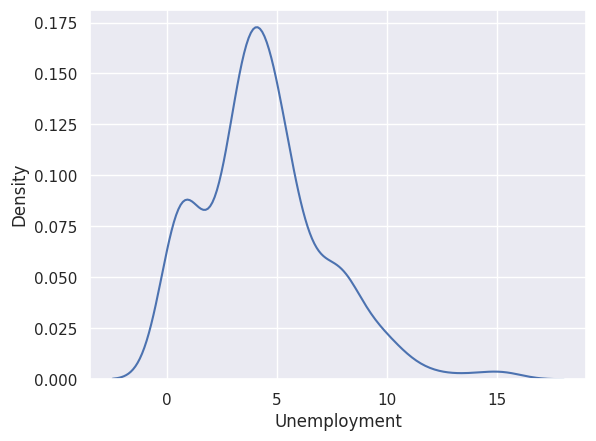

In [ ]:
sns.kdeplot(data=final_table['Unemployment'])


In [ ]:
plt.figure(figsize=(18, 5))
sns.heatmap(final_table.corr(), annot = True, lw = 1, linecolor = 'r', cmap = 'coolwarm')

In [ ]:
features = ["Inflation",'Unemployment','CPI']
print(features)

**MÔ HÌNH HỒI QUY TUYẾN TÍNH (Linear Regression)**

In [ ]:
X_train, X_test = train_test_split(final_table, test_size=0.2,shuffle=True, random_state=144)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train, X_valid = train_test_split(X_train, test_size=0.15,shuffle=True, random_state=144)

In [ ]:
y_train = X_train["Unemployment"].copy()
y_valid = X_valid["Unemployment"].copy()
y_test = X_test["Unemployment"].copy()

In [ ]:
y_train.shape, y_valid.shape, y_test.shape

((255,), (45,), (75,))

In [ ]:
print(X_train.columns)

Index(['Country Name', 'Year', 'GDP', 'Inflation', 'Exchange Rate',
       'Money Supply', 'Unemployment', 'FDI'],
      dtype='object')


In [ ]:
X_train.drop('Unemployment',axis=1, inplace=True)
X_train.drop("Country Name",axis=1, inplace=True)
X_train.drop("Year",axis=1, inplace=True)
X_valid.drop("Unemployment",axis=1, inplace=True)
X_valid.drop("Country Name",axis=1, inplace=True)
X_valid.drop("Year",axis=1, inplace=True)
X_test.drop("Unemployment",axis=1, inplace=True)
X_test.drop("Country Name",axis=1, inplace=True)
X_test.drop("Year",axis=1, inplace=True)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((255, 5), (45, 5), (75, 5))

In [ ]:
#Xử lý chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scMM = MinMaxScaler()
scMM.fit(X_train)

In [ ]:
#Chuẩn hóa biến đầu vào X(input)
X_train_MM_scaled = scMM.transform(X_train)
X_valid_MM_scaled = scMM.transform(X_valid)
X_test_MM_scaled = scMM.transform(X_test)

In [ ]:
X_train_MM_scaled.shape, X_valid_MM_scaled.shape, X_test_MM_scaled.shape

((255, 5), (45, 5), (75, 5))

In [ ]:
#Chuẩn hóa biến đầu ra y (outputs)
y_train.shape

In [ ]:
y_train.values.reshape(-1,1).shape

(255, 1)

In [ ]:
scMM_for_y = MinMaxScaler()
scMM_for_y.fit(y_train.values.reshape(-1,1))

In [ ]:
y_train_MM_scaled = scMM_for_y.transform(y_train.values.reshape(-1,1))
y_valid_MM_scaled = scMM_for_y.transform(y_valid.values.reshape(-1,1))
y_test_MM_scaled = scMM_for_y.transform(y_test.values.reshape(-1,1))

In [ ]:
y_train_MM_scaled.shape,y_valid_MM_scaled.shape,y_test_MM_scaled.shape

((255, 1), (45, 1), (75, 1))

In [ ]:
#Sử dụng thuật toán linear regression trong Supervised Machine Learning để dự báo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_MM_scaled, y_train_MM_scaled)

In [ ]:
print("Train set Linear Regression score: {:.3f}".format(lr.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Linear Regression score: {:.3f}".format(lr.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Linear Regression score: 0.071
Validation set Linear Regression score: 0.183


In [ ]:
from sklearn.metrics import mean_squared_error
train_preds = lr.predict(X_train_MM_scaled)
valid_preds = lr.predict(X_valid_MM_scaled)

In [ ]:
from sklearn.metrics import r2_score
print("Train R2 score: {:.4f}".format(r2_score(y_train_MM_scaled, train_preds)))
print("Validation R2 score: {:.4f}".format(r2_score(y_valid_MM_scaled, valid_preds)))

Train R2 score: 0.0708
Validation R2 score: 0.1833


In [ ]:
print("Test set Random Forest Regression score: {:.4f}".format(lr.score(X_test_MM_scaled, y_test_MM_scaled)))

Test set Random Forest Regression score: 0.0088


**MÔ HÌNH RỪNG CÂY NGẪU NHIÊN (Random Forest Regression)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#n_estimator = 10
forest_reg = RandomForestRegressor(n_estimators = 50, n_jobs=-1).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())

In [ ]:
print("Train set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

In [ ]:
#n_estimator = 700
forest_reg = RandomForestRegressor(n_estimators = 700, n_jobs=-1).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Random Forest Regression score: 0.9669
Validation set Random Forest Regression score: 0.7537


In [ ]:
print("Test set Random Forest Regression score: {:.4f}".format(forest_reg.score(X_test_MM_scaled, y_test_MM_scaled)))

Test set Random Forest Regression score: 0.7579


**THUẬT TOÁN GRADIENT BOOTING REGRESSION**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=60).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.8818
Validation set Gradient Booting Regression score: 0.7477


In [ ]:
#n_estimator = 50
gb_reg = GradientBoostingRegressor(n_estimators=100).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.9389
Validation set Gradient Booting Regression score: 0.7694


In [ ]:
#n_estimator = 100
gb_reg = GradientBoostingRegressor(n_estimators=400).fit(X_train_MM_scaled, y_train_MM_scaled.ravel())
print("Train set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("Validation set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Train set Gradient Booting Regression score: 0.9976
Validation set Gradient Booting Regression score: 0.7955


In [ ]:
print("Test set Gradient Booting Regression score: {:.4f}".format(gb_reg.score(X_test_MM_scaled,y_test_MM_scaled)))

Test set Gradient Booting Regression score: 0.7358


**Sử Dụng Bộ Dữ Liệu Test Để Kiểm Tra Độ Chính Xác Của Dự Báo**

In [ ]:
y_preds = gb_reg.predict(X_test_MM_scaled)
y_preds = scMM_for_y.inverse_transform(y_preds.reshape(-1,1))
y_preds

In [ ]:
print("Test R2 score: {:.4f}".format(r2_score(y_test,y_preds)))

Test R2 score: 0.7588


In [ ]:
#So sánh với phương pháp OLS truyền thống
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              75.35
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                    6.41e-48
Time:                        17:03:22   Log-Likelihood:                         -666.29
No. Observations:                 255   AIC:                                      1343.
Df Residuals:                     250   BIC:                                      1360.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDP             9.53e-14   5.79e-14      1.645      0.101   -1.88e-14    2.09e-13
Inflation         0.0778      0.026      3.034      0.003       0.027       0.128
Exchange Rate  2.527e-05   4.27e-05      0.591      0.555   -5.89e-05       0.000
Money Supply      0.0321      0.003     12.505      0.000       0.027       0.037
FDI           -7.141e-12   3.85e-12     -1.856      0.065   -1.47e-11    4.38e-13
==============================================================================
Omnibus:                        9.981   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.569
Skew:                           0.490   Prob(JB):                      0.00507
Kurtosis:                       2.813   Cond. No.                     5.37e+11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**MÁY VECTOR HỖ TRỢ**

In [ ]:
from sklearn.svm import SVR
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)


In [ ]:
svm1_pred = svm1.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))


MAE: 1.8968926603125082
RMSE: 2.9530687005265936
R2_Score:  0.009191939822394524


In [ ]:
final_table['Year']=pd.to_datetime(final_table['Year'])
print(final_table['Year'])

0     2003-01-01
1     2003-01-01
2     2003-01-01
3     2003-01-01
4     2003-01-01
         ...    
495   2022-01-01
496   2022-01-01
497   2022-01-01
498   2022-01-01
499   2022-01-01
Name: Year, Length: 500, dtype: datetime64[ns]


In [ ]:
date_change = final_table.set_index('Year')


In [ ]:
date_change

<Axes: xlabel='Year'>

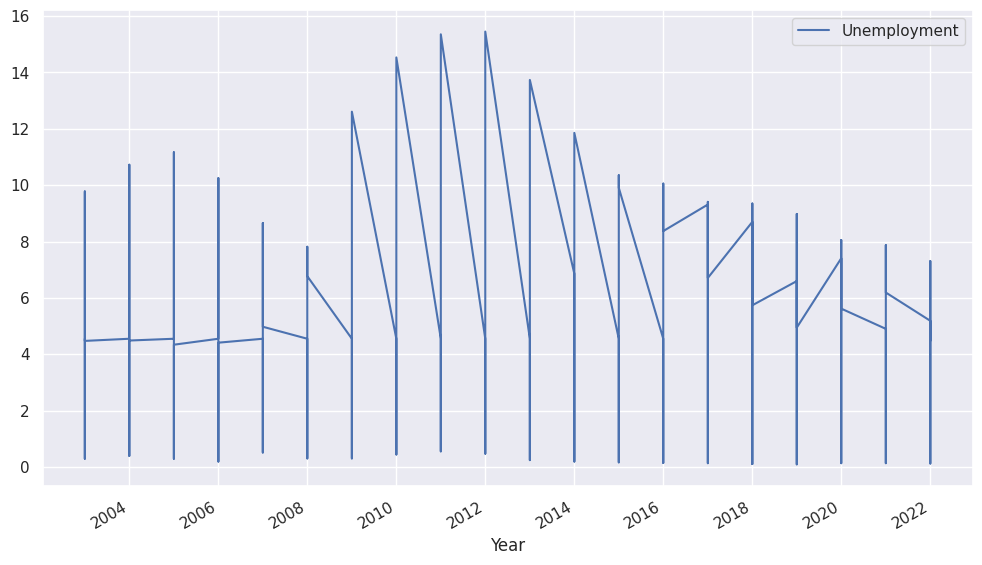

In [ ]:
final_table.plot(x='Year', y='Unemployment', figsize=(12,7))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,10), activation="relu", solver="adam", max_iter=1)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
score = model.score(X_test, y_test)
print("Điểm đánh giá:", score)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Dự đoán GDP:")
print(y_pred)

Dự đoán GDP:
[0.59853168 0.63384493 1.19493765 1.33685721 1.59127531 1.17598032
 0.56639484 0.97958226 0.79243182 0.68904733 0.6958989  1.40785107
 0.61455731 0.58972753 1.7772422  1.26740992 0.47454026 2.04011636
 2.11264936 1.32566987 1.23108843 1.12013181 2.45547279 0.64929779
 1.52266378 0.62558374 0.90977509 1.91793957 2.04428199 1.80314743
 1.18788702 0.72621902 0.82730194 0.59409732 1.89535462 0.4858571
 1.21572282 3.48605311 1.1851274  0.65763832 0.75791901 1.83988411
 0.92940549 1.81742121 1.20092191 0.56159138 0.68811134 0.4709583
 0.42587288 1.93877211 1.22941437 1.67721767 1.36363889 1.51040611
 0.58852674 1.13937117 1.05254731 0.96373069 2.24222457 0.62939593
 1.04561193 0.67203042 0.62861724 0.67762065 0.81050738 0.93788931
 1.26490728 1.48097517 1.30114415 0.57725189 0.39338713 1.35882061
 1.21535889 3.22815733 0.5147281 ]


In [ ]:


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))